# 集成学习
吴雅妃 2210515003 房美贤 2210515014

### 1. 数据集
加载 Iris数据集

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data # features
y = iris.target # labels

### 2. 数据预处理

数据清洗、缺失值处理和特征缩放，划分训练测试数据集。

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 将特征缩放成均值为0，方差为1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 3. 分类
分别使用 **lr** 和 **svm** 进行分类

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
lr = LogisticRegression()
lr.fit(X_train, y_train)
svm = SVC()
svm.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_svm = svm.predict(X_test)
print('y_pred_lr:',y_pred_lr)
print('y_pred_svm:',y_pred_svm)
from sklearn.metrics import accuracy_score
acc_lr=accuracy_score(y_test, y_pred_lr)
acc_svm=accuracy_score(y_test, y_pred_svm)
print('acc_lr:',acc_lr)
print('acc_svm:',acc_svm)


y_pred_lr: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
y_pred_svm: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
acc_lr: 1.0
acc_svm: 1.0


### 4. Bagging
使用决策树作为基学习器，并给出在包外估计下的性能指标。

In [4]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
# 使用带有10棵决策树的集成学习器
bag = BaggingClassifier(dt, n_estimators=10, oob_score=True)
bag.fit(X_train, y_train)
# 获得包外估计得分
oob_score = bag.oob_score_
print(f"包外得分: {oob_score}")
y_pred_bag = bag.predict(X_test)
# 在测试集中设置性能指标
acc_bag = accuracy_score(y_test, y_pred_bag)
pre_bag = precision_score(y_test, y_pred_bag, average='macro')
rec_bag = recall_score(y_test, y_pred_bag, average='macro')
f1_bag = f1_score(y_test, y_pred_bag, average='macro')
print(f"测试集的集成性能指标:")
print(f"Accuracy: {acc_bag}")
print(f"Precision: {pre_bag}")
print(f"Recall: {rec_bag}")
print(f"F1-score: {f1_bag}")


包外得分: 0.9333333333333333
测试集的集成性能指标:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


### 5. Boosting
利用sklearn中AdaBoost与GBDT实现分类。

In [5]:
dt = DecisionTreeClassifier()
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# 集成十颗决策树的AdaBoost算法
ada = AdaBoostClassifier(dt, n_estimators=10)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
acc_ada = accuracy_score(y_test, y_pred_ada)
pre_ada = precision_score(y_test, y_pred_ada, average='macro')
rec_ada = recall_score(y_test, y_pred_ada, average='macro')
f1_ada = f1_score(y_test, y_pred_ada, average='macro')
print(f"测试集的AdaBoost集成性能指标:")
print(f"Accuracy: {acc_ada}")
print(f"Precision: {pre_ada}")
print(f"Recall: {rec_ada}")
print(f"F1-score: {f1_ada}")

# 集成十颗决策树的GBDT算法
gbdt = GradientBoostingClassifier(n_estimators=10)
gbdt.fit(X_train, y_train)
y_pred_gbdt = gbdt.predict(X_test)
acc_gbdt = accuracy_score(y_test, y_pred_gbdt)
pre_gbdt = precision_score(y_test, y_pred_gbdt, average='macro')
rec_gbdt = recall_score(y_test, y_pred_gbdt, average='macro')
f1_gbdt = f1_score(y_test, y_pred_gbdt, average='macro')
print(f"测试集的GBDT集成性能指标:")
print(f"Accuracy: {acc_gbdt}")
print(f"Precision: {pre_gbdt}")
print(f"Recall: {rec_gbdt}")
print(f"F1-score: {f1_gbdt}")

测试集的AdaBoost集成性能指标:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
测试集的GBDT集成性能指标:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


### 6.随机森林：


In [20]:

from sklearn.ensemble import RandomForestClassifier
# 使用集成10棵树和默认参数的随机森林
rf_default = RandomForestClassifier(n_estimators=10)
rf_default.fit(X_train,y_train)
y_pred_rf_default = rf_default.predict(X_test)
acc_rf_default = accuracy_score(y_test,y_pred_rf_default)
pre_rf_default = precision_score(y_test,y_pred_rf_default ,average='macro')
rec_rf_default= recall_score(y_test,y_pred_rf_default ,average='macro')
f1_rf_default= f1_score(y_test,y_pred_rf_default ,average='macro')
print(f"测试集的RandomG集成性能指标(n_estimators=10):")
print(f"Accuracy: {acc_rf_default}")
print(f"Precision: {pre_rf_default}")
print(f"Recall: {rec_rf_default}")
print(f"F1-score: {f1_rf_default}")

# 使用集成10棵树和默认参数的随机森林
rf_more_trees = RandomForestClassifier(n_estimators=20)
rf_more_trees.fit(X_train,y_train)
y_pred_rf_more_trees= rf_more_trees.predict(X_test)
acc_rf_more_trees= accuracy_score(y_test,y_pred_rf_more_trees )
pre_rf_more_trees= precision_score(y_test,y_pred_rf_more_trees ,average='macro')
rec_rf_more_trees= recall_score(y_test,y_pred_rf_more_trees ,average='macro')
f1_rf_more_trees= f1_score(y_test,y_pred_rf_more_trees ,average='macro')
print(f"测试集的RandomG集成性能指标(n_estimators=20):")
print(f"Accuracy: {acc_rf_more_trees}")
print(f"Precision: {pre_rf_more_trees}")
print(f"Recall: {rec_rf_more_trees}")
print(f"F1-score: {f1_rf_more_trees}")
# n_estimators=10 and sqrt features for each tree 
rf_sqrt_features= RandomForestClassifier(n_estimators=10,max_features="sqrt")
rf_sqrt_features.fit(X_train,y_train)
y_pred_rf_sqrt_features= rf_sqrt_features.predict(X_test)
acc_rf_sqrt_features= accuracy_score(y_test,y_pred_rf_sqrt_features )
pre_rf_sqrt_features= precision_score(y_test,y_pred_rf_sqrt_features ,average='macro')
rec_rf_sqrt_features= recall_score(y_test,y_pred_rf_sqrt_features ,average='macro')
f1_rf_sqrt_features= f1_score(y_test,y_pred_rf_sqrt_features ,average='macro')
print(f"测试集的RandomG集成性能指标(n_estimators=10 and sqrt features for each tree ):")
print(f"Accuracy: {acc_rf_sqrt_features}")
print(f"Precision: {pre_rf_sqrt_features}")
print(f"Recall: {rec_rf_sqrt_features}")
print(f"F1-score: {f1_rf_sqrt_features}")


测试集的RandomG集成性能指标(n_estimators=10):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
测试集的RandomG集成性能指标(n_estimators=20):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
测试集的RandomG集成性能指标(n_estimators=10 and sqrt features for each tree ):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


观察上面的性能指标，可见所有算法在这个简单的数据集上，性能都表现完美，根据使用集成10棵树的随机森林和默认参数的随机森林在数据集上的训练观察特征重要性。

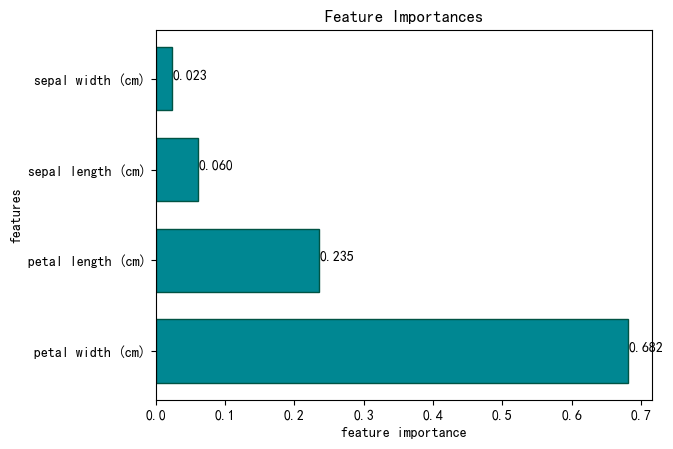

In [23]:
# 导入相关库
import pandas as pd
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
# 转换成DataFrame对象，并指定列名
data = pd.DataFrame(X_train, columns=iris.feature_names)
target = pd.DataFrame(y_train, columns=['target'])
# 获取特征重要性分数
feature_importance = pd.DataFrame(data.columns, columns=['feature'])
feature_importance['importance'] = rf_default.feature_importances_
# 对特征重要性分数进行排序
feature_importance.sort_values('importance', ascending=False, inplace=True)
# 绘制水平柱状图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.barh(feature_importance['feature'], feature_importance['importance'], height=0.7, color ='#008792', edgecolor ='#005344') # 更多颜色可参见颜色大全
plt.xlabel('feature importance') # x 轴标签
plt.ylabel('features') # y轴标签
plt.title('Feature Importances') # 标题
for a,b in zip(feature_importance['importance'],feature_importance['feature']): # 添加数字标签
    plt.text(a+0.001, b,'%.3f'%float(a)) # a+0.001代表标签位置在柱形图上方0.001处
plt.show()